The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


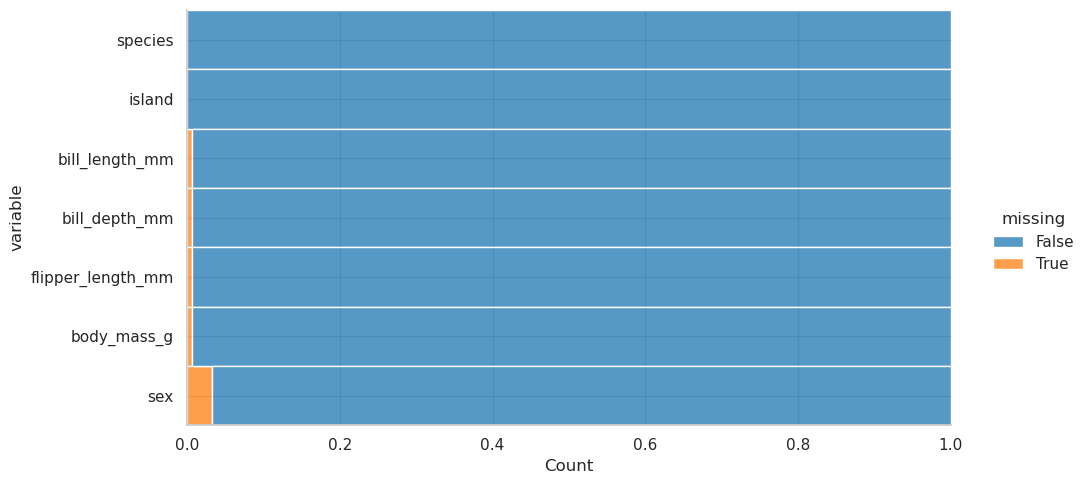

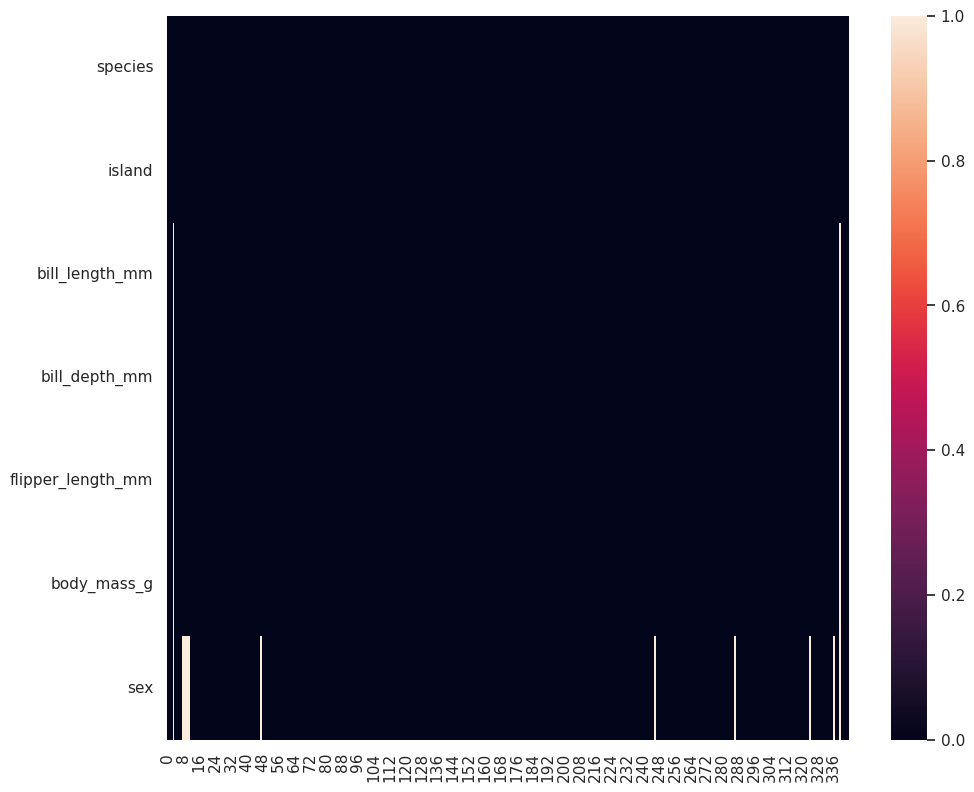

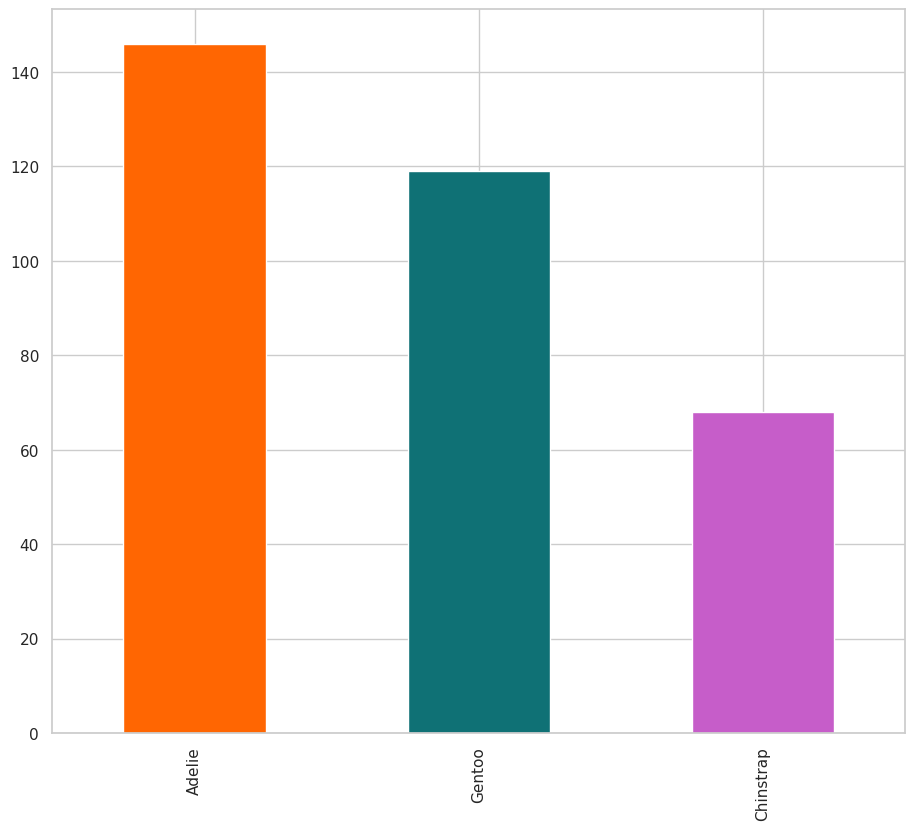

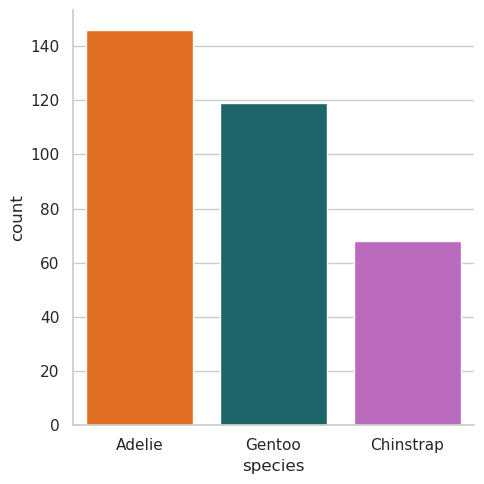

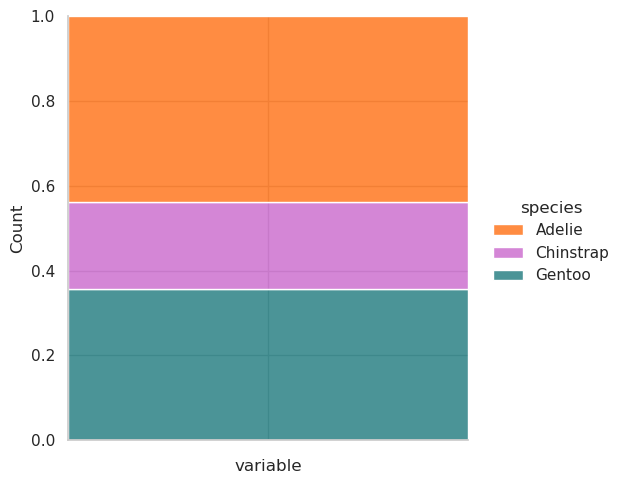

/tmp/ipykernel_32170/1098114682.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean()
/tmp/ipykernel_32170/1658957529.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.median()
/tmp/ipykernel_32170/3242987746.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this

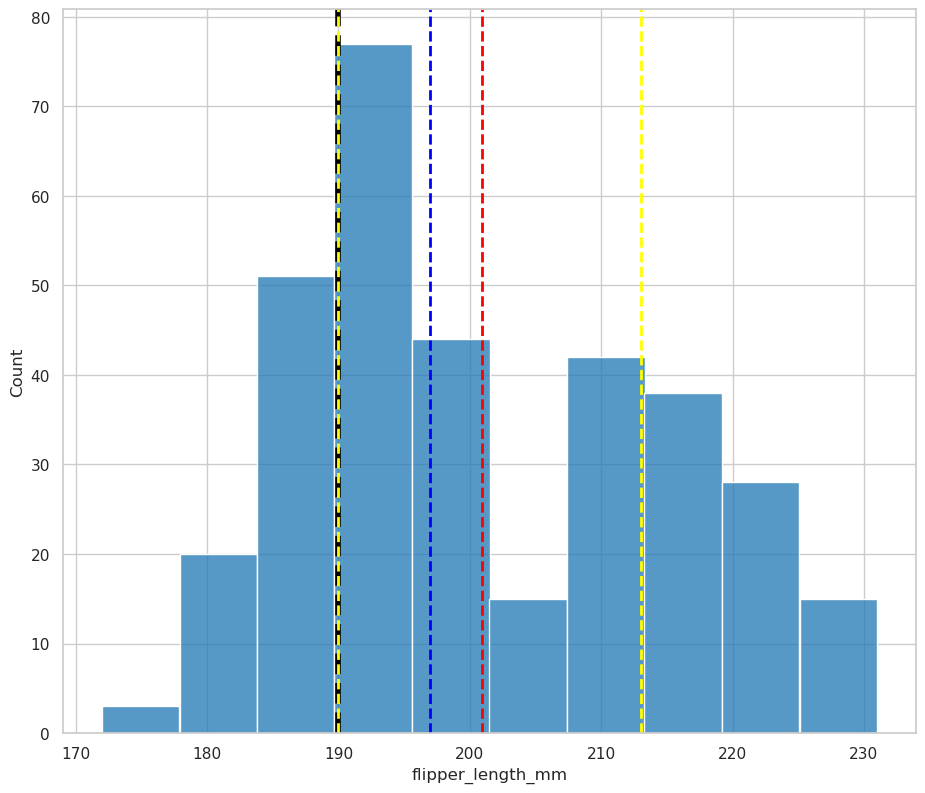

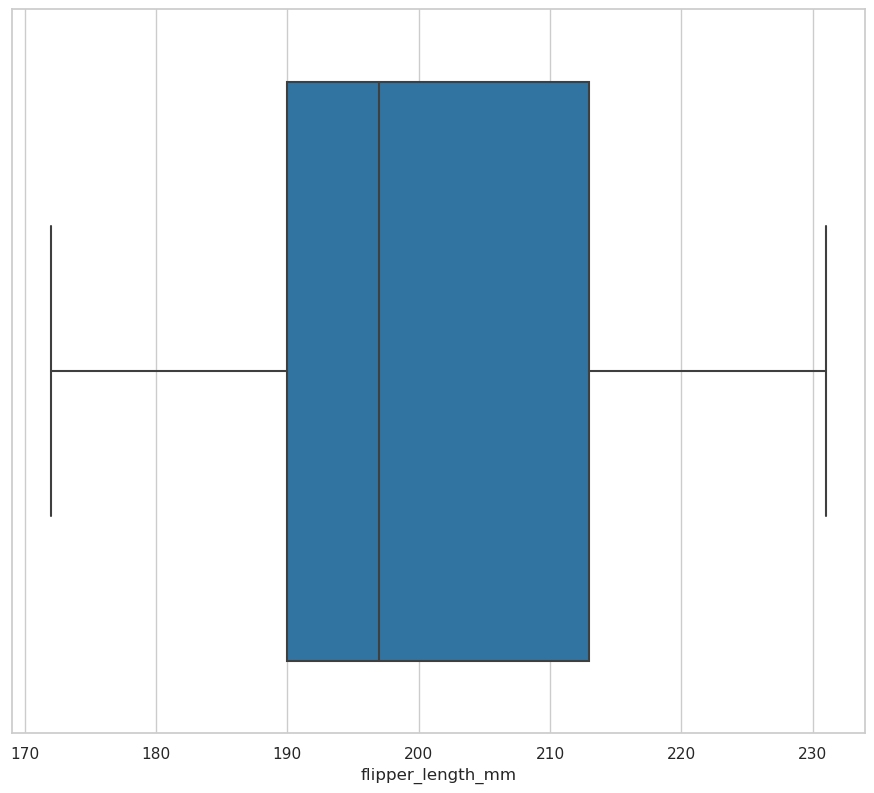

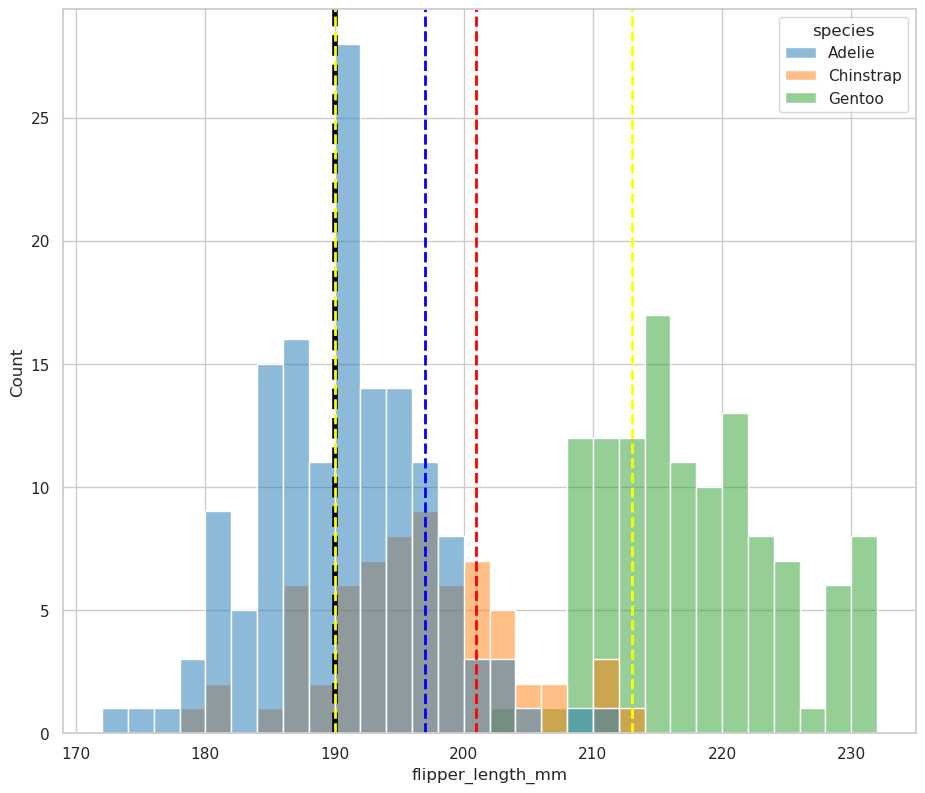

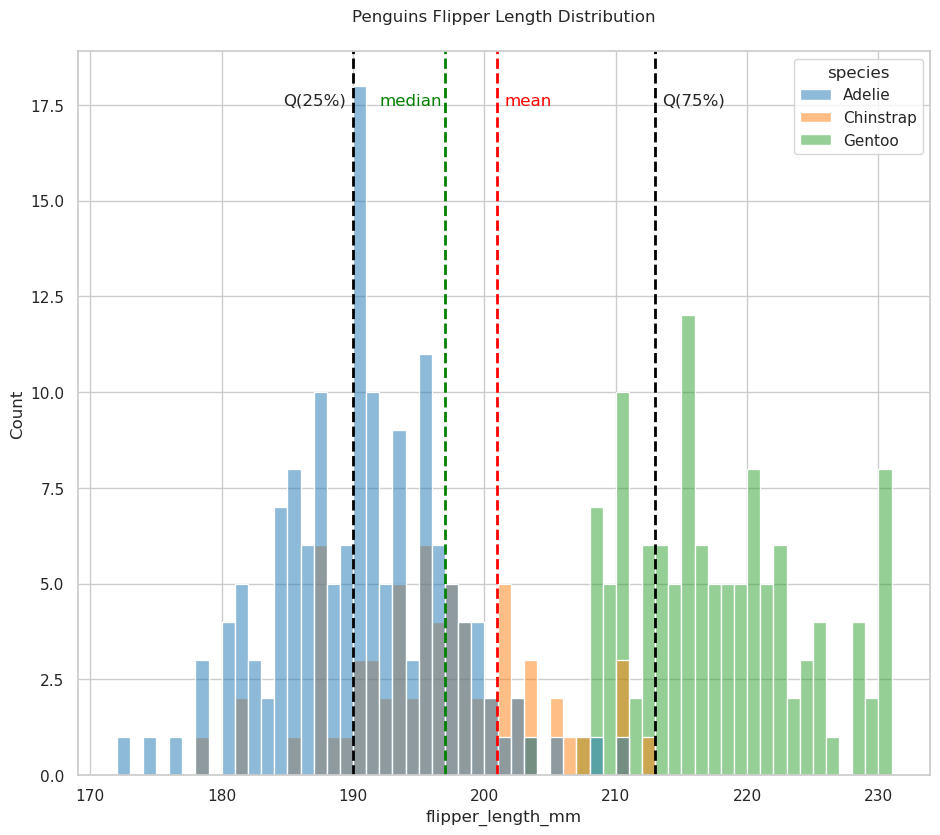

In [2]:
%run "0.5-antoniolml-medidas-dispersión.ipynb"

## **Distribuciones: PMFs, CDFs y PDFs**

## Funciones de probabilidad de masas (PMFs)

Utilizando **seaborn** 

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Probability'>

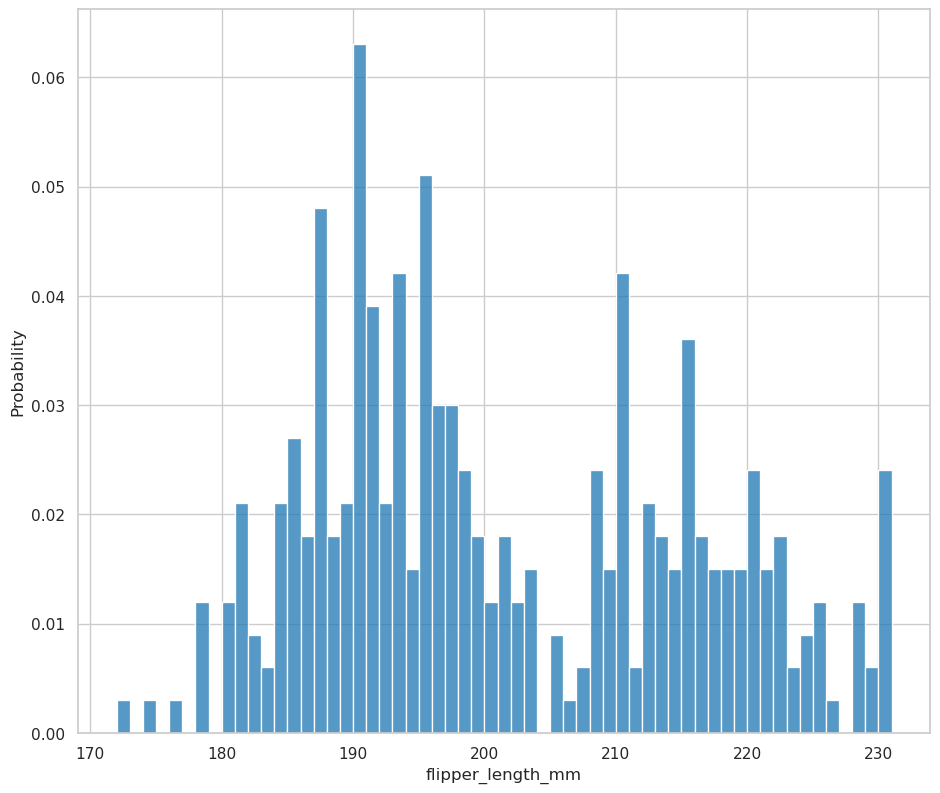

In [3]:
sns.histplot(
    data=processed_penguins_df,
    x="flipper_length_mm",
    binwidth=1,
    stat="probability", # para que represente la probabilidad
) # las alas son numeros exactos. entonces podemos usar binwidth=1

## **Utilizando empiricaldist**


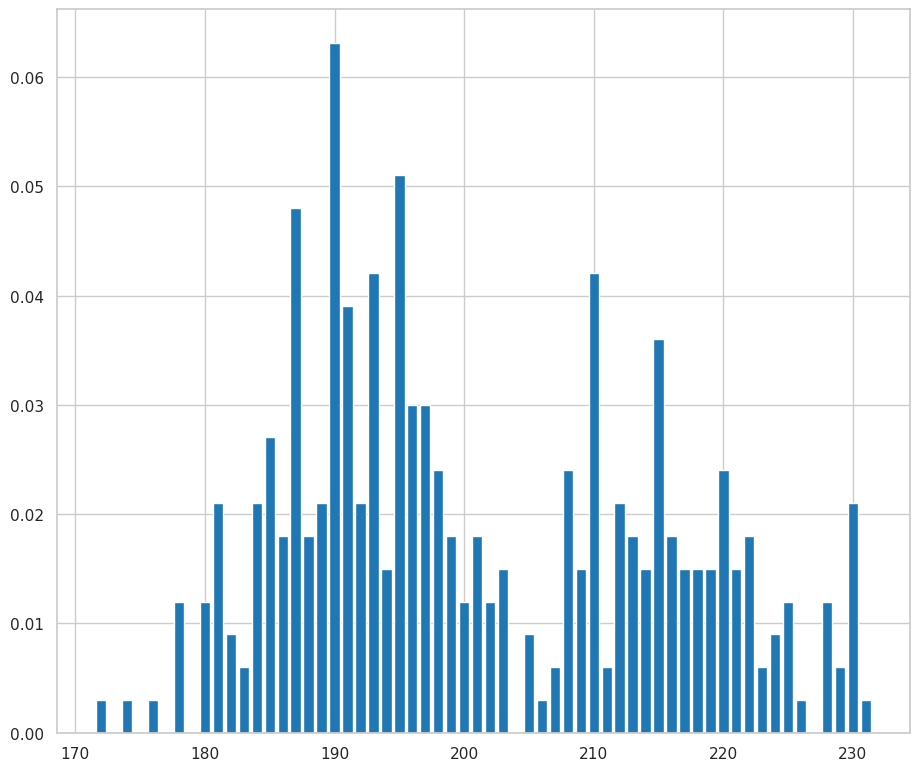

In [8]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    processed_penguins_df["flipper_length_mm"],
    normalize=True
) # otra forma de hacerlo con la libreria empiricaldist, nos da una  tabla y su probabilidad
pmf_flipper_length_mm.bar()

In [10]:
pmf_flipper_length_mm(231)# buscamos el punto para analizar la probabilidad PMF

0.003003003003003003

In [11]:
processed_penguins_df.flipper_length_mm.max() # buscamos el valor maximo de la columna 

231.0

## **Funciones empirícas de probabilidad acumulada (ECDFs)**

**Utilizando seaborn**

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

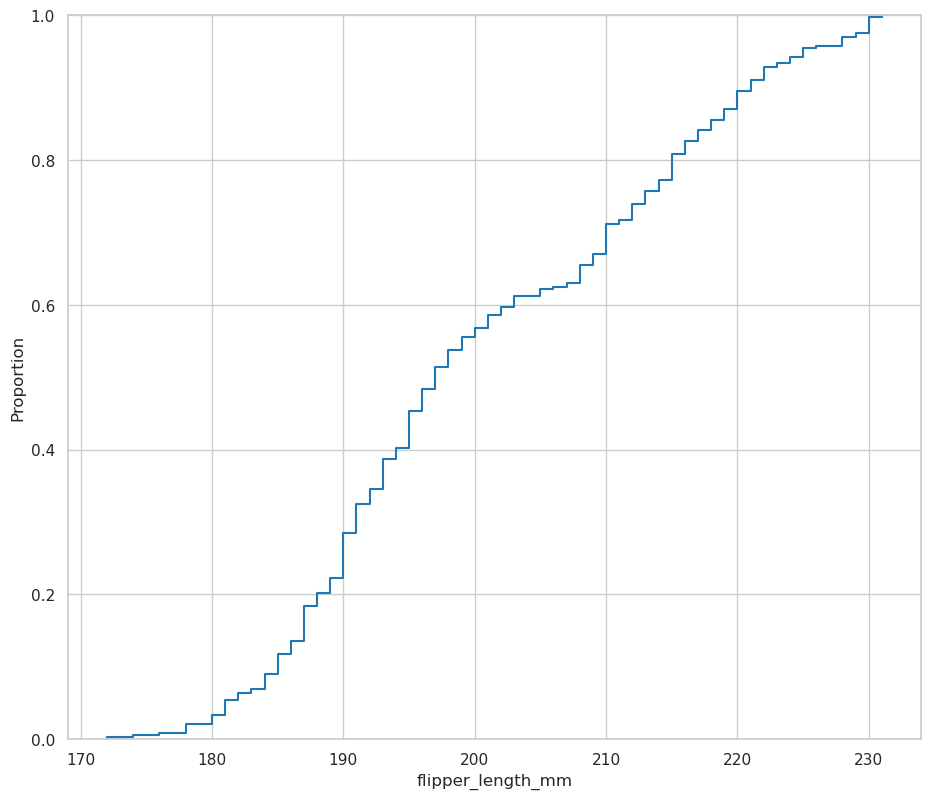

In [15]:
sns.ecdfplot( # ecdfplot es una funcion que nos da la distribucion acumulada
    data=processed_penguins_df,
    x="flipper_length_mm",
)
# its show us the cumulative distribution function

## **Utilizando empiricaldist**


In [26]:
cdf_flipper_length_mm=empiricaldist.Cdf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
) # utilzando empiricaldist. 

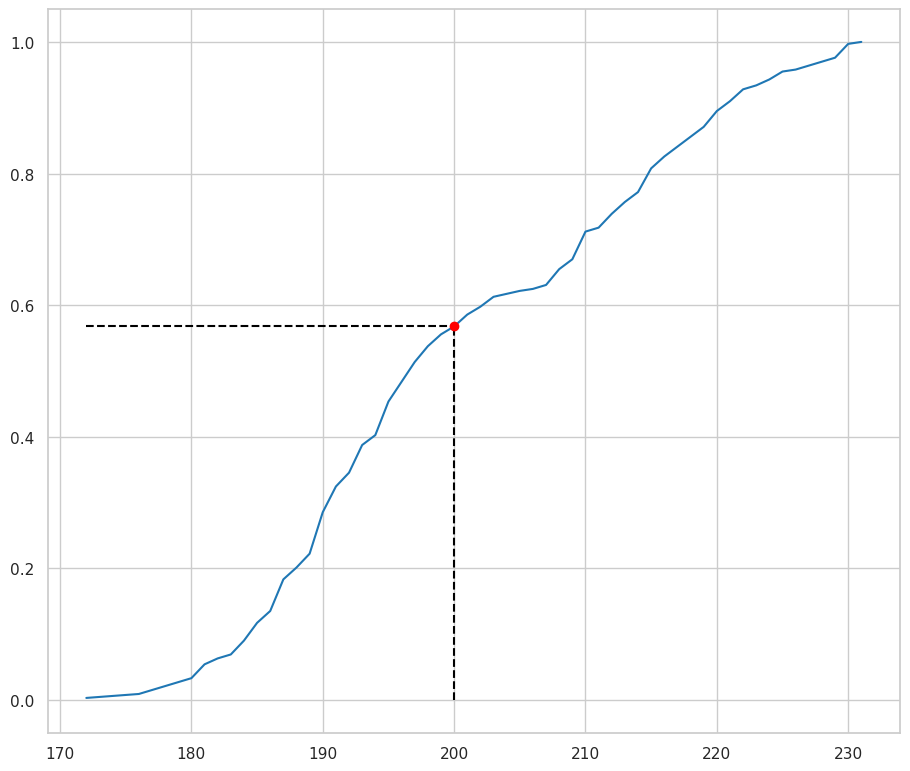

In [27]:
cdf_flipper_length_mm.plot() # graficamos la distribucion acumulada

q=200 # cantidad de alas
p=cdf_flipper_length_mm.forward(q) # probabilidad de que las alas sean menores a 200, forward es para buscar la probabilidad

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color="black",
    linestyle="dashed",
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    colors="black",
    linestyle="dashed",
)

plt.plot(q,p,"ro")

[190. 213.]


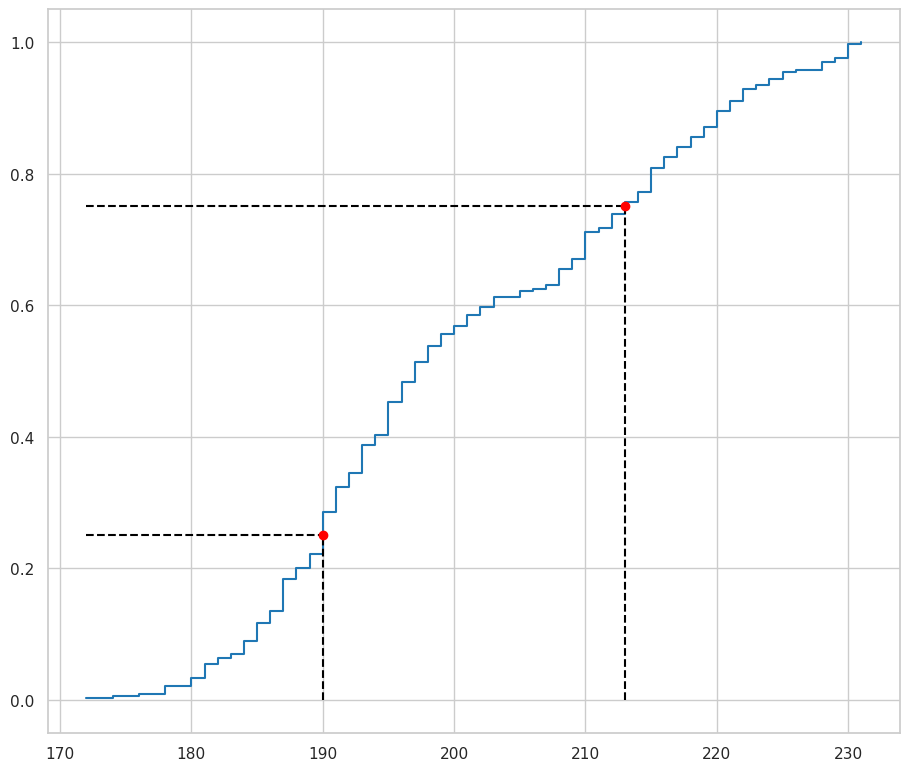

In [32]:
cdf_flipper_length_mm.step()

p_1=0.25
p_2=0.75

ps=(0.25,0.75)
qs=cdf_flipper_length_mm.inverse(ps) # nos retorna el valor inverso de la probabilidad

plt.vlines(
    x=qs,
    ymin=0,
    ymax=ps,
    color="black",
    linestyle="dashed",
)

plt.hlines(
    y=ps,
    xmin=pmf_flipper_length_mm.qs[0], #qs es el valor de la columna
    xmax=qs,
    color="black",
    linestyle="dashed",
)

plt.scatter(
    x=qs,
    y=ps,  
    color="red",
    zorder=3
)

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

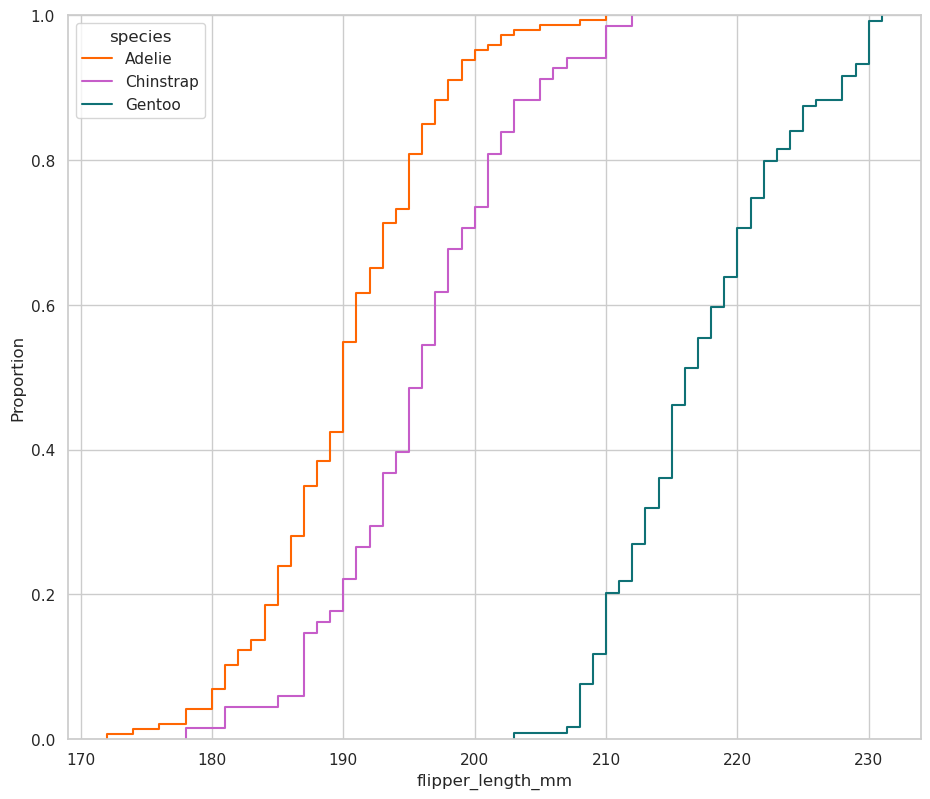

In [29]:
sns.ecdfplot(
    data=processed_penguins_df,
    x="flipper_length_mm",
    hue="species",
    palette=penguin_color
)